In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy  
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install wget

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


The following lines of code download the Borough details of London Borough and would cleanse the data.

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'
London_borough_list= pd.read_html(url)[0]

In [4]:
London_borough_list.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [5]:
LondonBoroughData = pd.DataFrame(London_borough_list)

In [6]:
London_Borough_data = LondonBoroughData[['Borough']].copy()

In [7]:
London_Borough_data.head()

,Borough
0,Barking and Dagenham [note 1]
1,Barnet
2,Bexley
3,Brent
4,Bromley


In [8]:
LondonDistrict = pd.read_csv("Postcode_districts.csv")

In [9]:
LondonDistrict.head()

,Postcode,Latitude,Longitude,Easting,Northing,Grid Reference,Town/Area,Region,Postcodes,Active postcodes,Population,Households,Nearby districts
0,AB1,57.1269,-2.13644,391839.0,804005.0,NJ918040,Aberdeen,Aberdeen,2655.0,0.0,NaN,NaN,"AB10, AB15, AB9, AB25, AB2, AB12, AB16, AB11, ..."
1,AB2,57.1713,-2.14152,391541.0,808948.0,NJ915089,Aberdeen,Aberdeen,3070.0,0.0,NaN,NaN,"AB16, AB22, AB24, AB25, AB1, AB9, AB15, AB10, ..."
2,AB3,57.0876,-2.59624,363963.0,799780.0,NO639997,Aberdeen,Aberdeen,2168.0,0.0,NaN,NaN,"AB31, AB34, AB52, AB33, AB14, AB32, AB30, AB13..."
3,AB4,57.5343,-2.12713,392487.0,849358.0,NJ924493,"Fraserburgh, Peterhead, Macduff",Aberdeen,2956.0,0.0,NaN,NaN,"AB41, AB43, AB42, AB53, AB22, AB23, AB2, AB24,..."
4,AB5,57.4652,-2.64764,361248.0,841843.0,NJ612418,"Buckie, Huntly, Inverurie",Aberdeen,3002.0,0.0,NaN,NaN,"AB54, AB52, AB45, AB53, AB33, AB44, AB55, AB51..."


In [10]:
LondonDistrictTrimmed = LondonDistrict[['Postcode','Latitude','Longitude','Region','Postcodes']].copy()

In [11]:
LondonBoroughwithGIS = LondonDistrictTrimmed.loc[LondonDistrictTrimmed['Region'].isin(London_Borough_data['Borough'])]

In [12]:
LondonBoroughwithGIS.head()

,Postcode,Latitude,Longitude,Region,Postcodes
267,BR1,51.4107,0.019417,Bromley,2072.0
268,BR2,51.3904,0.021653,Bromley,1403.0
269,BR3,51.4034,-0.031672,Bromley,2092.0
270,BR4,51.3757,-0.009896,Bromley,583.0
271,BR5,51.3892,0.102547,Bromley,1306.0


In [13]:
LondonData = LondonBoroughwithGIS[LondonBoroughwithGIS.Postcodes != 67.0]

In [14]:
LondonData = LondonData[LondonData.Postcodes != 5.0]


In [15]:
LondonData.head()

,Postcode,Latitude,Longitude,Region,Postcodes
267,BR1,51.4107,0.019417,Bromley,2072.0
268,BR2,51.3904,0.021653,Bromley,1403.0
269,BR3,51.4034,-0.031672,Bromley,2092.0
270,BR4,51.3757,-0.009896,Bromley,583.0
271,BR5,51.3892,0.102547,Bromley,1306.0


The following lines of code get the geo coordinates of London.

In [16]:
address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="London_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


The Following lines of codes will show all the boroughs of london marked on a map of london.

In [17]:
map_London = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(LondonData['Latitude'], LondonData['Longitude'], LondonData['Region']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London

In [18]:
%%html
<img src="London_Borough_map.jpg",width="200",height="200">

Getting the attributes of the API call in order.

In [19]:
CLIENT_ID = 'L2YC5V3P20VYR5G54RNBYOGX5KHVPCESQJNCWOKDENXKZOKS' # your Foursquare ID
CLIENT_SECRET = 'MZSNJU4D3JBWXJWPARX0XU1PQG0DI50L3SAGURYJP2HJXPES' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: L2YC5V3P20VYR5G54RNBYOGX5KHVPCESQJNCWOKDENXKZOKS
CLIENT_SECRET:MZSNJU4D3JBWXJWPARX0XU1PQG0DI50L3SAGURYJP2HJXPES


Getting the url in order for the foursquare API call

In [20]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=L2YC5V3P20VYR5G54RNBYOGX5KHVPCESQJNCWOKDENXKZOKS&client_secret=MZSNJU4D3JBWXJWPARX0XU1PQG0DI50L3SAGURYJP2HJXPES&v=20180605&ll=51.5073219,-0.1276474&radius=500&limit=100'

In [21]:
results = requests.get(url).json()

The following lines of code read the result json file we got as a result of the foursquare API call and get the required details from the file into a seperate DataFrame.

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues_London = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_London = nearby_venues_London.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_London['venue.categories'] = nearby_venues_London.apply(get_category_type, axis=1)

# clean columns
nearby_venues_London.columns = [col.split(".")[-1] for col in nearby_venues_London.columns]

nearby_venues_London.head()

,name,categories,lat,lng
0,National Gallery,Art Museum,51.508876,-0.128478
1,Trafalgar Square,Plaza,51.508128,-0.128086
2,East Trafalgar Square Fountain,Fountain,51.508088,-0.127700
3,Sainsbury Wing National Gallery,Art Museum,51.508384,-0.129001
4,ESPA Life at Corinthia,Spa,51.506402,-0.125114


In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_London.shape[0]))

100 venues were returned by Foursquare.


In [364]:
London_restaurants = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Restaurant")].reset_index(drop=True)

In [365]:
London_Coffee = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Coffee")].reset_index(drop=True)

In [366]:
London_Hotel = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Hotel")].reset_index(drop=True)

In [367]:
London_Burger = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Burger")].reset_index(drop=True)

In [368]:
London_pizza = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Pizza")].reset_index(drop=True)

In [369]:
London_eateries = pd.concat([London_Coffee,London_Hotel,London_restaurants,London_Burger,London_pizza]).reset_index(drop=True)

In [370]:
London_eateries.shape

(36, 4)

In [371]:
map_London = folium.Map(location=[latitude, longitude], zoom_start=15.5)

# add markers to map
for lat, lng, label in zip(London_eateries['lat'], London_eateries['lng'], London_eateries['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London

In [372]:
%%html
<img src="London_eateries_pic.jpg",width="200",height="200">

In [373]:
London_Gallery = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Gallery")].reset_index(drop=True)

In [374]:
London_Museum = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Museum")].reset_index(drop=True)

In [375]:
London_Monument = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Monument")].reset_index(drop=True)

In [376]:
London_Sculpture = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Sculpture")].reset_index(drop=True)

In [377]:
London_church = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Church")].reset_index(drop=True)

In [378]:
London_Historic_places = pd.concat([London_Gallery,London_Museum,London_Monument,London_Sculpture,London_church]).reset_index(drop=True)

In [379]:
London_Historic_places.shape

(11, 4)

In [380]:
map_London = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(London_Historic_places['lat'], London_Historic_places['lng'], London_Historic_places['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London

In [381]:
%%html
<img src="London_Historic_places_pic.jpg",width="200",height="200">

In [382]:
London_Theater = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Theater")].reset_index(drop=True)

In [383]:
London_Bars = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Bar")].reset_index(drop=True)

In [384]:
London_Pubs = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Pub")].reset_index(drop=True)

In [385]:
London_spa = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Spa")].reset_index(drop=True)

In [386]:
London_recreation = pd.concat([London_Theater,London_Bars,London_Pubs,London_spa]).reset_index(drop=True)

In [387]:
London_recreation.shape

(25, 4)

In [388]:
map_London = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(London_recreation['lat'], London_recreation['lng'], London_recreation['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London

In [389]:
%%html
<img src="London_recreation_pic.jpg",width="200",height="200">

In [390]:
London_Plaza = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Plaza")].reset_index(drop=True)

In [391]:
London_Store = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Store")].reset_index(drop=True)

In [392]:
London_Shop = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Shop")].reset_index(drop=True)

In [393]:
London_Boutique= nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Boutique")].reset_index(drop=True)

In [394]:
London_shopping = pd.concat([London_Plaza,London_Store,London_Shop,London_Boutique]).reset_index(drop=True)

In [395]:
London_shopping.shape

(16, 4)

In [396]:
map_London = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(London_shopping['lat'], London_shopping['lng'], London_shopping['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London

In [397]:
%%html
<img src="London_shopping_pic.jpg",width="200",height="200">

In [398]:
London_Garden = nearby_venues_London.loc[nearby_venues_London['categories'].str.contains("Garden")].reset_index(drop=True)

In [399]:
London_Garden.shape

(3, 4)

In [400]:
map_London = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(London_Garden['lat'], London_Garden['lng'], London_Garden['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London

In [401]:
%%html
<img src="London_gardens_pic.jpg",width="200",height="200">

In [29]:
LondonBorough = LondonData.Region.unique()

In [30]:
LondonBoroughdf = pd.DataFrame(LondonBorough)

In [38]:
LondonBoroughdf.rename( columns={0:'Borough'}, inplace=True )

In [58]:
LondonBoroughdf.head()

,Borough
0,Bromley
1,Croydon
2,Merton
3,Bexley
4,Tower Hamlets


In [59]:
def getlatlong(address):
    latlong_list=[]
    for address in zip(address):
        geolocator = Nominatim(user_agent="London_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
                
        latlong_list.append([(
            latitude,
            longitude)])
    latlongdf = pd.DataFrame([item for latlong_list in latlong_list for item in latlong_list])
    latlongdf.columns = ['Latitude', 
                  'Longitude']
    return(latlongdf)
            

In [65]:
LondonBoroughGIS = getlatlong(address=LondonBoroughdf['Borough'])

In [66]:
LondonBoroughGIS.head()

,Latitude,Longitude
0,51.402805,0.014814
1,51.371305,-0.101957
2,51.410803,-0.188098
3,51.441679,0.150488
4,51.128863,1.298669


In [67]:
LondonBoroughGIS['Neighborhood'] = LondonBoroughdf['Borough']

In [68]:
LondonBoroughGIS.head()

,Latitude,Longitude,Neighborhood
0,51.402805,0.014814,Bromley
1,51.371305,-0.101957,Croydon
2,51.410803,-0.188098,Merton
3,51.441679,0.150488,Bexley
4,51.128863,1.298669,Tower Hamlets


In [111]:
LondonBoroughGIS.set_index('Neighborhood')

,Latitude,Longitude
Neighborhood,,
Bromley,51.402805,0.014814
Croydon,51.371305,-0.101957
Merton,51.410803,-0.188098
Bexley,51.441679,0.150488
Tower Hamlets,51.128863,1.298669
Waltham Forest,51.556999,-0.005835
Hackney,51.543240,-0.049362
Newham,51.530000,0.029318
Redbridge,51.576253,0.045410


In [73]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
                    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [74]:
London_venues = getNearbyVenues(names=LondonBoroughGIS['Neighborhood'],
                                   latitudes=LondonBoroughGIS['Latitude'],
                                   longitudes=LondonBoroughGIS['Longitude']
                                  )

In [75]:
London_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bromley,51.402805,0.014814,unico,51.402189,0.015725,Ice Cream Shop
1,Bromley,51.402805,0.014814,Apple Bromley,51.402800,0.015947,Electronics Store
2,Bromley,51.402805,0.014814,Church House Gardens,51.403010,0.012149,Park
3,Bromley,51.402805,0.014814,Marks & Spencer,51.404040,0.015237,Department Store
4,Bromley,51.402805,0.014814,Wilko,51.401089,0.016260,Furniture / Home Store


In [405]:
London_restaurants = London_venues.loc[London_venues['Venue Category'].str.contains("Restaurant")].reset_index(drop=True)
London_Coffee = London_venues.loc[London_venues['Venue Category'].str.contains("Coffee")].reset_index(drop=True)
London_Hotel = London_venues.loc[London_venues['Venue Category'].str.contains("Hotel")].reset_index(drop=True)
London_Burger = London_venues.loc[London_venues['Venue Category'].str.contains("Burger")].reset_index(drop=True)
London_pizza = London_venues.loc[London_venues['Venue Category'].str.contains("Pizza")].reset_index(drop=True)
London_eateries = pd.concat([London_Coffee,London_Hotel,London_restaurants,London_Burger,London_pizza]).reset_index(drop=True)
London_eateries.shape

(385, 8)

In [409]:
London_Gallery = London_venues.loc[London_venues['Venue Category'].str.contains("Gallery")].reset_index(drop=True)
London_Museum = London_venues.loc[London_venues['Venue Category'].str.contains("Museum")].reset_index(drop=True)
London_Monument = London_venues.loc[London_venues['Venue Category'].str.contains("Monument")].reset_index(drop=True)
London_Sculpture = London_venues.loc[London_venues['Venue Category'].str.contains("Sculpture")].reset_index(drop=True)
London_church = London_venues.loc[London_venues['Venue Category'].str.contains("Church")].reset_index(drop=True)
London_Historic_places = pd.concat([London_Gallery,London_Museum,London_Monument,London_Sculpture,London_church]).reset_index(drop=True)
London_Historic_places.shape                                                                                                                      

(4, 8)

In [411]:
London_Theater = London_venues.loc[London_venues['Venue Category'].str.contains("Theater")].reset_index(drop=True)
London_Bars = London_venues.loc[London_venues['Venue Category'].str.contains("Pub")].reset_index(drop=True)
London_spa = London_venues.loc[London_venues['Venue Category'].str.contains("Spa")].reset_index(drop=True)
London_recreation = pd.concat([London_Theater,London_Bars,London_Pubs,London_spa]).reset_index(drop=True)
London_recreation.shape


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


(96, 12)

In [413]:
London_Plaza = London_venues.loc[London_venues['Venue Category'].str.contains("Plaza")].reset_index(drop=True)
London_Store = London_venues.loc[London_venues['Venue Category'].str.contains("Store")].reset_index(drop=True)
London_Shop = London_venues.loc[London_venues['Venue Category'].str.contains("Shop")].reset_index(drop=True)
London_Boutique= London_venues.loc[London_venues['Venue Category'].str.contains("Boutique")].reset_index(drop=True)
London_shopping = pd.concat([London_Plaza,London_Store,London_Shop,London_Boutique]).reset_index(drop=True)
London_shopping.shape

(249, 8)

In [416]:
London_Garden = London_venues.loc[London_venues['Venue Category'].str.contains("Garden")].reset_index(drop=True)
London_Parks = London_venues.loc[London_venues['Venue Category'].str.contains("Park")].reset_index(drop=True)
London_Gardenandpark = pd.concat([London_Garden,London_Parks]).reset_index(drop=True)
London_Gardenandpark.shape

(28, 8)

In [417]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.3


In [422]:
data = [['Eateries',36], ['Historic_places', 11], ['Recreation',25],['Shopping',16],['Garden_or_park',3]] 
Consolidated_Central_london_data = pd.DataFrame(data, columns =['Category','Central London'])

[Text(0, 0, 'Eateries'),
 Text(0, 0, 'Historic_places'),
 Text(0, 0, 'Recreation'),
 Text(0, 0, 'Shopping'),
 Text(0, 0, 'Garden_or_park')]

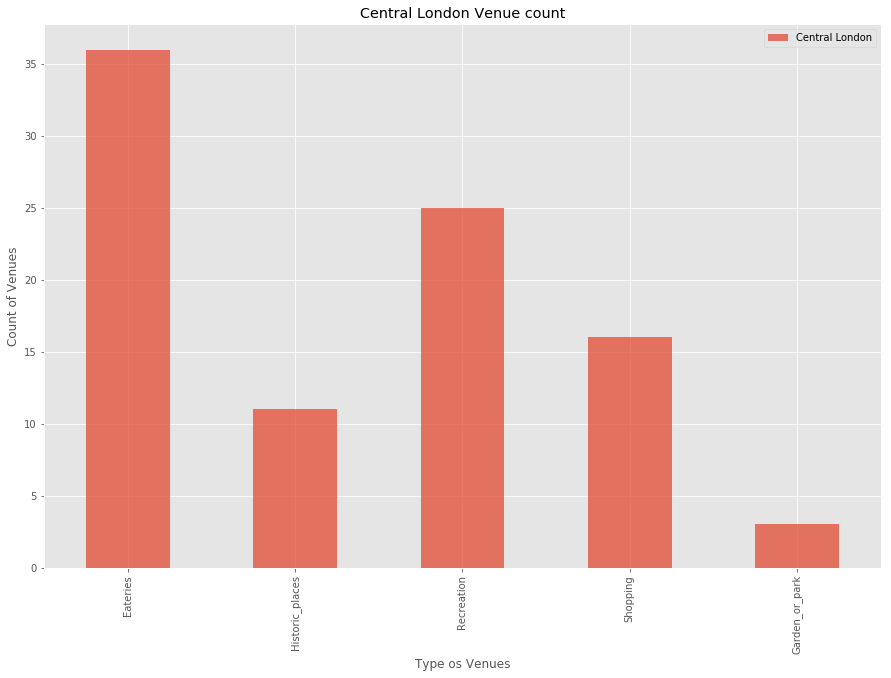

In [423]:
ax = Consolidated_Central_london_data.plot(kind='bar', alpha=0.75, figsize=(15, 10))

ax.set_title('Central London Venue count')
ax.set_ylabel('Count of Venues')
ax.set_xlabel('Type os Venues')
ax.set_xticks(Consolidated_Central_london_data.index)
ax.set_xticklabels(Consolidated_Central_london_data.Category, rotation=90)

In [424]:
data = [['Eateries',385], ['Historic_places', 4], ['Recreation',96],['Shopping',249],['Garden_or_park',28]] 
Consolidated_Restof_london_data = pd.DataFrame(data, columns =['Category','Central London'])

[Text(0, 0, 'Eateries'),
 Text(0, 0, 'Historic_places'),
 Text(0, 0, 'Recreation'),
 Text(0, 0, 'Shopping'),
 Text(0, 0, 'Garden_or_park')]

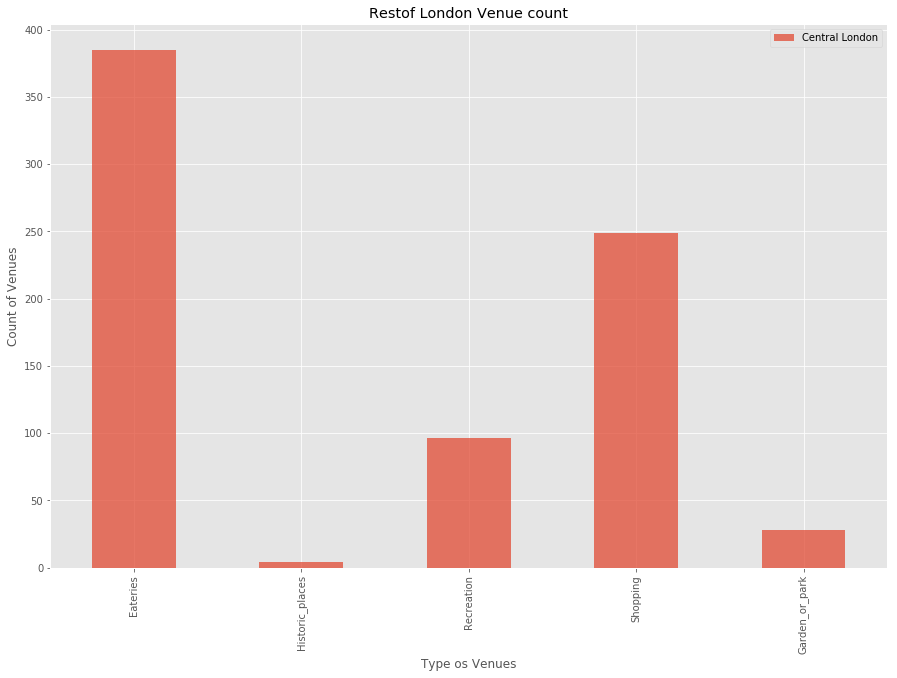

In [425]:
ax = Consolidated_Restof_london_data.plot(kind='bar', alpha=0.75, figsize=(15, 10))

ax.set_title('Restof London Venue count')
ax.set_ylabel('Count of Venues')
ax.set_xlabel('Type os Venues')
ax.set_xticks(Consolidated_Restof_london_data.index)
ax.set_xticklabels(Consolidated_Restof_london_data.Category, rotation=90)

In [345]:
London_Venues_grouped = London_venues.groupby('Neighborhood')['Neighborhood'].value_counts()

In [343]:
London_Venues_grouped

Neighborhood            Neighborhood          
Barnet                  Barnet                      2
Bexley                  Bexley                     11
Brent                   Brent                       1
Bromley                 Bromley                    45
Camden                  Camden                     21
Croydon                 Croydon                    25
Ealing                  Ealing                     94
Hackney                 Hackney                    29
Haringey                Haringey                   35
Harrow                  Harrow                      6
Hillingdon              Hillingdon                  4
Hounslow                Hounslow                   49
Islington               Islington                  96
Kensington and Chelsea  Kensington and Chelsea     58
Kingston upon Thames    Kingston upon Thames      100
Lambeth                 Lambeth                    68
Lewisham                Lewisham                   59
Merton                  Merton     

In [77]:
print('There are {} uniques categories.'.format(len(London_venues['Venue Category'].unique())))

There are 186 uniques categories.


In [78]:
# one hot encoding
London_onehot = pd.get_dummies(London_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
London_onehot['Neighborhood'] = London_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [London_onehot.columns[-1]] + list(London_onehot.columns[:-1])
London_onehot = London_onehot[fixed_columns]

London_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Baby Store,Bagel Shop,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bistro,Bookstore,Border Crossing,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Music Venue,Nightclub,Noodle House,Optical Shop,Organic Grocery,Outlet Store,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Portuguese Restaurant,Pub,Public Art,Public Bathroom,Ramen Restaurant,Record Shop,Restaurant,Road,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Shopping Mall,Shopping Plaza,Skate Park,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toll Plaza,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Women's Store,Yoga Studio
0,Bromley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bromley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bromley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bromley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [79]:
London_onehot.shape

(982, 187)

In [80]:
London_grouped = London_onehot.groupby('Neighborhood').mean().reset_index()
London_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Baby Store,Bagel Shop,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bistro,Bookstore,Border Crossing,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Music Venue,Nightclub,Noodle House,Optical Shop,Organic Grocery,Outlet Store,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Portuguese Restaurant,Pub,Public Art,Public Bathroom,Ramen Restaurant,Record Shop,Restaurant,Road,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Shopping Mall,Shopping Plaza,Skate Park,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toll Plaza,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Women's Store,Yoga Studio
0,Barnet,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [81]:
num_top_venues = 5

for hood in London_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = London_grouped[London_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barnet----
                       venue  freq
0            Bed & Breakfast   1.0
1          Afghan Restaurant   0.0
2              Metro Station   0.0
3  Middle Eastern Restaurant   0.0
4          Mobile Phone Shop   0.0


----Bexley----
                  venue  freq
0                   Pub  0.18
1  Fast Food Restaurant  0.18
2        Breakfast Spot  0.09
3     Indian Restaurant  0.09
4      Greek Restaurant  0.09


----Brent----
                       venue  freq
0            Border Crossing   1.0
1          Afghan Restaurant   0.0
2              Metro Station   0.0
3  Middle Eastern Restaurant   0.0
4          Mobile Phone Shop   0.0


----Bromley----
                  venue  freq
0        Clothing Store  0.11
1           Coffee Shop  0.11
2                   Pub  0.07
3  Gym / Fitness Center  0.07
4          Burger Joint  0.04


----Camden----
            venue  freq
0            Bank   0.1
1            Park   0.1
2        Pharmacy   0.1
3      Restaurant   0.1
4  Sandwich Place

In [82]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [304]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = London_grouped['Neighborhood']

for ind in np.arange(London_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(London_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnet,Bed & Breakfast,Yoga Studio,Fish & Chips Shop,Farmers Market,Farm,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Eastern European Restaurant
1,Bexley,Fast Food Restaurant,Pub,Indian Restaurant,Greek Restaurant,Train Station,Toy / Game Store,Supermarket,Breakfast Spot,Italian Restaurant,Discount Store
2,Brent,Border Crossing,Yoga Studio,Fish & Chips Shop,Farmers Market,Farm,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Eastern European Restaurant
3,Bromley,Clothing Store,Coffee Shop,Gym / Fitness Center,Pub,Pizza Place,Burger Joint,Park,Bookstore,Irish Pub,Cosmetics Shop
4,Camden,Pharmacy,Restaurant,Bank,Sandwich Place,Park,History Museum,Coffee Shop,Donut Shop,Bus Station,Salad Place


In [305]:
# set number of clusters
kclusters = 5

London_grouped_clustering = London_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(London_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 2, 1, 1, 1, 1, 1, 1, 1])

In [306]:
neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

London_merged = LondonBoroughGIS

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
London_merged = London_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

London_merged.head() # check the last columns!

,Latitude,Longitude,Neighborhood,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,51.402805,0.014814,Bromley,1.0,Clothing Store,Coffee Shop,Gym / Fitness Center,Pub,Pizza Place,Burger Joint,Park,Bookstore,Irish Pub,Cosmetics Shop
1,51.371305,-0.101957,Croydon,1.0,Coffee Shop,Pub,Indian Restaurant,Portuguese Restaurant,Mediterranean Restaurant,Spanish Restaurant,Café,Bookstore,Caribbean Restaurant,Sushi Restaurant
2,51.410803,-0.188098,Merton,1.0,Tram Station,Pub,Farm,Thai Restaurant,Brazilian Restaurant,Dessert Shop,Flea Market,Cricket Ground,Park,Hardware Store
3,51.441679,0.150488,Bexley,1.0,Fast Food Restaurant,Pub,Indian Restaurant,Greek Restaurant,Train Station,Toy / Game Store,Supermarket,Breakfast Spot,Italian Restaurant,Discount Store
4,51.128863,1.298669,Tower Hamlets,3.0,Pub,Yoga Studio,Dim Sum Restaurant,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Dive Bar


In [307]:
London_mergedfinal = London_merged.drop(London_merged.index[[11,17,19]])

In [308]:
London_mergedfinal

,Latitude,Longitude,Neighborhood,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,51.402805,0.014814,Bromley,1.0,Clothing Store,Coffee Shop,Gym / Fitness Center,Pub,Pizza Place,Burger Joint,Park,Bookstore,Irish Pub,Cosmetics Shop
1,51.371305,-0.101957,Croydon,1.0,Coffee Shop,Pub,Indian Restaurant,Portuguese Restaurant,Mediterranean Restaurant,Spanish Restaurant,Café,Bookstore,Caribbean Restaurant,Sushi Restaurant
2,51.410803,-0.188098,Merton,1.0,Tram Station,Pub,Farm,Thai Restaurant,Brazilian Restaurant,Dessert Shop,Flea Market,Cricket Ground,Park,Hardware Store
3,51.441679,0.150488,Bexley,1.0,Fast Food Restaurant,Pub,Indian Restaurant,Greek Restaurant,Train Station,Toy / Game Store,Supermarket,Breakfast Spot,Italian Restaurant,Discount Store
4,51.128863,1.298669,Tower Hamlets,3.0,Pub,Yoga Studio,Dim Sum Restaurant,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Dive Bar
5,51.556999,-0.005835,Waltham Forest,1.0,Fast Food Restaurant,Pub,Fried Chicken Joint,Coffee Shop,Café,Clothing Store,Platform,Bus Stop,Pizza Place,Optical Shop
6,51.543240,-0.049362,Hackney,1.0,Coffee Shop,Pub,Vietnamese Restaurant,Café,Restaurant,Beer Store,Sporting Goods Shop,Boutique,Brewery,Butcher
7,51.530000,0.029318,Newham,4.0,Fast Food Restaurant,Pub,Park,Café,Diner,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Eastern European Restaurant
8,51.576253,0.045410,Redbridge,1.0,Metro Station,Pub,Pizza Place,Hotel,Eastern European Restaurant,Yoga Studio,Diner,Event Space,English Restaurant,Electronics Store
9,51.538429,-0.099905,Islington,1.0,Pub,Mediterranean Restaurant,Burger Joint,Gastropub,Bakery,Restaurant,French Restaurant,Coffee Shop,Ice Cream Shop,Café


In [315]:
London_mergedfinal

,Latitude,Longitude,Neighborhood,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,51.402805,0.014814,Bromley,1,Clothing Store,Coffee Shop,Gym / Fitness Center,Pub,Pizza Place,Burger Joint,Park,Bookstore,Irish Pub,Cosmetics Shop
1,51.371305,-0.101957,Croydon,1,Coffee Shop,Pub,Indian Restaurant,Portuguese Restaurant,Mediterranean Restaurant,Spanish Restaurant,Café,Bookstore,Caribbean Restaurant,Sushi Restaurant
2,51.410803,-0.188098,Merton,1,Tram Station,Pub,Farm,Thai Restaurant,Brazilian Restaurant,Dessert Shop,Flea Market,Cricket Ground,Park,Hardware Store
3,51.441679,0.150488,Bexley,1,Fast Food Restaurant,Pub,Indian Restaurant,Greek Restaurant,Train Station,Toy / Game Store,Supermarket,Breakfast Spot,Italian Restaurant,Discount Store
4,51.128863,1.298669,Tower Hamlets,3,Pub,Yoga Studio,Dim Sum Restaurant,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Dive Bar
5,51.556999,-0.005835,Waltham Forest,1,Fast Food Restaurant,Pub,Fried Chicken Joint,Coffee Shop,Café,Clothing Store,Platform,Bus Stop,Pizza Place,Optical Shop
6,51.543240,-0.049362,Hackney,1,Coffee Shop,Pub,Vietnamese Restaurant,Café,Restaurant,Beer Store,Sporting Goods Shop,Boutique,Brewery,Butcher
7,51.530000,0.029318,Newham,4,Fast Food Restaurant,Pub,Park,Café,Diner,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Eastern European Restaurant
8,51.576253,0.045410,Redbridge,1,Metro Station,Pub,Pizza Place,Hotel,Eastern European Restaurant,Yoga Studio,Diner,Event Space,English Restaurant,Electronics Store
9,51.538429,-0.099905,Islington,1,Pub,Mediterranean Restaurant,Burger Joint,Gastropub,Bakery,Restaurant,French Restaurant,Coffee Shop,Ice Cream Shop,Café


In [316]:
London_mergedfinal.Cluster_Labels = London_mergedfinal.Cluster_Labels.astype(int)

In [317]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(London_mergedfinal['Latitude'], London_mergedfinal['Longitude'], London_mergedfinal['Neighborhood'], London_mergedfinal['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [363]:
%%html
<img src="London_Borugh_clusters.jpg",width="200",height="200">

In [323]:
London_mergedfinal.loc[London_mergedfinal['Cluster_Labels'] == 0, London_mergedfinal.columns[[2] + list(range(3, London_mergedfinal.shape[1]))]]

,Neighborhood,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Barnet,0,Bed & Breakfast,Yoga Studio,Fish & Chips Shop,Farmers Market,Farm,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Eastern European Restaurant


In [324]:
London_mergedfinal.loc[London_mergedfinal['Cluster_Labels'] == 1, London_mergedfinal.columns[[2] + list(range(3, London_mergedfinal.shape[1]))]]

,Neighborhood,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bromley,1,Clothing Store,Coffee Shop,Gym / Fitness Center,Pub,Pizza Place,Burger Joint,Park,Bookstore,Irish Pub,Cosmetics Shop
1,Croydon,1,Coffee Shop,Pub,Indian Restaurant,Portuguese Restaurant,Mediterranean Restaurant,Spanish Restaurant,Café,Bookstore,Caribbean Restaurant,Sushi Restaurant
2,Merton,1,Tram Station,Pub,Farm,Thai Restaurant,Brazilian Restaurant,Dessert Shop,Flea Market,Cricket Ground,Park,Hardware Store
3,Bexley,1,Fast Food Restaurant,Pub,Indian Restaurant,Greek Restaurant,Train Station,Toy / Game Store,Supermarket,Breakfast Spot,Italian Restaurant,Discount Store
5,Waltham Forest,1,Fast Food Restaurant,Pub,Fried Chicken Joint,Coffee Shop,Café,Clothing Store,Platform,Bus Stop,Pizza Place,Optical Shop
6,Hackney,1,Coffee Shop,Pub,Vietnamese Restaurant,Café,Restaurant,Beer Store,Sporting Goods Shop,Boutique,Brewery,Butcher
8,Redbridge,1,Metro Station,Pub,Pizza Place,Hotel,Eastern European Restaurant,Yoga Studio,Diner,Event Space,English Restaurant,Electronics Store
9,Islington,1,Pub,Mediterranean Restaurant,Burger Joint,Gastropub,Bakery,Restaurant,French Restaurant,Coffee Shop,Ice Cream Shop,Café
10,Camden,1,Pharmacy,Restaurant,Bank,Sandwich Place,Park,History Museum,Coffee Shop,Donut Shop,Bus Station,Salad Place
13,Harrow,1,Convenience Store,Coffee Shop,Home Service,Clothing Store,Indian Restaurant,Sandwich Place,Diner,Falafel Restaurant,Event Space,English Restaurant


In [325]:
London_mergedfinal.loc[London_mergedfinal['Cluster_Labels'] == 2, London_mergedfinal.columns[[2] + list(range(3, London_mergedfinal.shape[1]))]]

,Neighborhood,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Brent,2,Border Crossing,Yoga Studio,Fish & Chips Shop,Farmers Market,Farm,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Eastern European Restaurant


In [326]:
London_mergedfinal.loc[London_mergedfinal['Cluster_Labels'] == 3, London_mergedfinal.columns[[2] + list(range(3, London_mergedfinal.shape[1]))]]

,Neighborhood,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Tower Hamlets,3,Pub,Yoga Studio,Dim Sum Restaurant,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Dive Bar


In [327]:
London_mergedfinal.loc[London_mergedfinal['Cluster_Labels'] == 4, London_mergedfinal.columns[[2] + list(range(3, London_mergedfinal.shape[1]))]]

,Neighborhood,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Newham,4,Fast Food Restaurant,Pub,Park,Café,Diner,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Eastern European Restaurant
14,Hillingdon,4,Fast Food Restaurant,Pub,Chinese Restaurant,Park,Diner,Falafel Restaurant,Event Space,English Restaurant,Electronics Store,Eastern European Restaurant


In [328]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.3


In [348]:
London_venues['Dummy']= 1

In [349]:
London_Venues_grouped = London_venues.groupby('Neighborhood')['Dummy'].value_counts()

Text(0.5, 0, 'Neighbourhood')

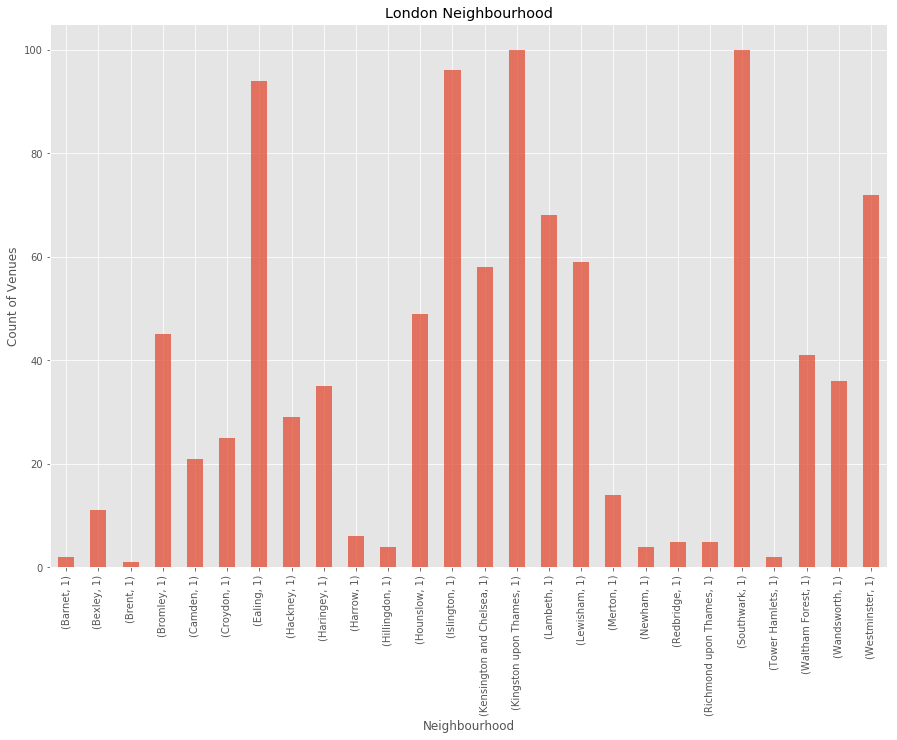

In [350]:
ax = London_Venues_grouped.plot(kind='bar', alpha=0.75, figsize=(15, 10))

ax.set_title('London Neighbourhood')
ax.set_ylabel('Count of Venues')
ax.set_xlabel('Neighbourhood')
